In [1]:
from __future__ import print_function

%matplotlib inline
%load_ext autoreload
%autoreload 2

# from __future__ import print_function

import os
import sys
import matplotlib.pyplot as plt

from keras.applications.imagenet_utils import preprocess_input
from keras.models import load_model
from keras.datasets import mnist

sys.path.append('..')
from utils import display_examples, RotNetDataGenerator, angle_error, binarize_images

from data.text_docs import get_filenames as get_text_docs_data
data_path = os.path.join('..\\','data', 'text_docs')

Using TensorFlow backend.


In [2]:
data_path

'..\\data\\text_docs'

## Load data

In [3]:
# (X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = get_text_docs_data(data_path)

Converting pdfs to images...
Done converting pdfs...


In [4]:
X_test.shape

(45, 160, 160)

In [5]:
len(X_test)

45

## Load model

In [6]:
# model_location = os.path.join('..', 'models', 'rotnet_mnist.hdf5')
model_location = os.path.join('..', 'models', 'rotnet_text_docs.hdf5')

model = load_model(model_location, custom_objects={'angle_error': angle_error})

## Evaluate model

In [7]:
batch_size =1                            #128
out = model.evaluate_generator(
    RotNetDataGenerator(
        X_test,
        batch_size=batch_size,
        preprocess_func=binarize_images,
        shuffle=True
    ), 
    #steps=len(y_test) / batch_size
    steps=len(X_test) / batch_size
)

print('Test loss:', out[0])
print('Test angle error:', out[1])

Test loss: 0.002188194077461958
Test angle error: 0.24444444477558136


## Display examples

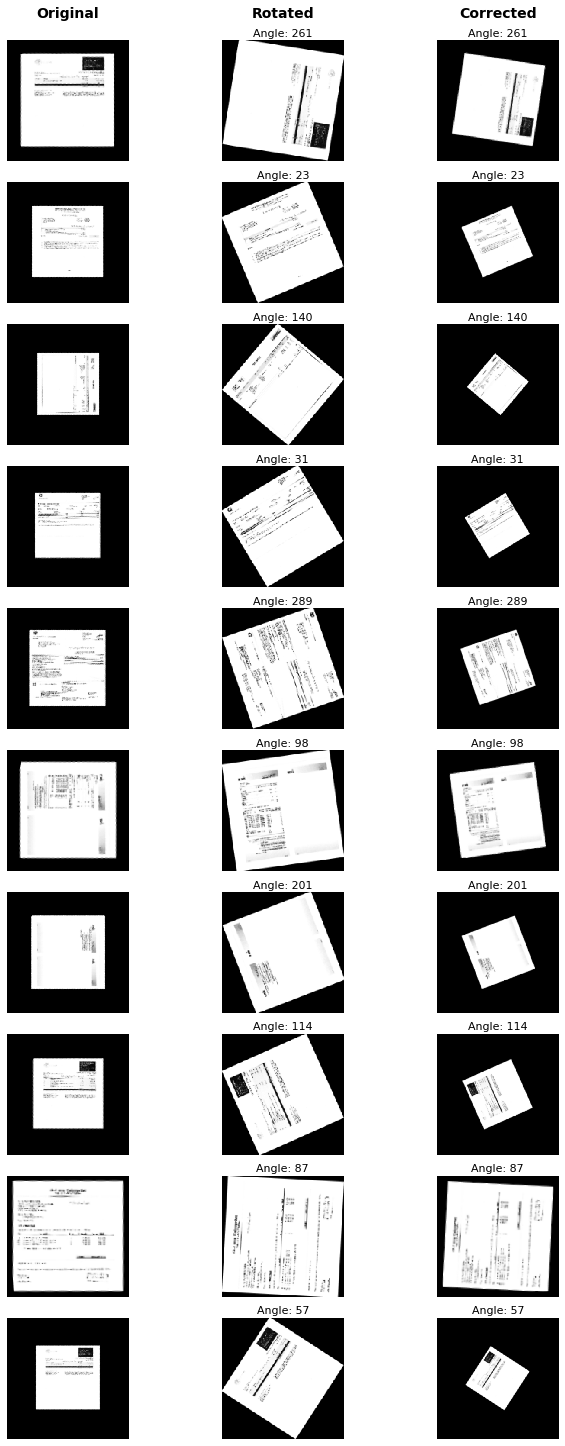

In [8]:
num_images = 10

display_examples(
    model, 
    X_test,
    num_images=num_images,
    preprocess_func=binarize_images,
)